Submission for Leena Godbole (IAC-621)


Tasks completed in this notebook:
Member: (30 pts)
Calculate COVID-19 data trends for last week of the data. Are the cases increasing, decreasing, or stable? Each student chooses a state to analyze.
Each student member creates notebooks to read the Enrichment data and displays them on a notebook.
Each student member performs initial merges with the COVID-19 data using the variables in the Enrichment data.

In [1]:
# libraries

import pandas as pd
import numpy as np
import math 

In [2]:
# loading prepped dataset

# Note, our group combined all datasets - cases, population, and deaths, in a WIDE data frame, which I am not using here
# My preference is to use the LONG dataset, which combined cases and deaths

df = pd.read_csv('ProjectDataStage1LONGFORMAT.csv')

In [3]:
# changing display size of output
pd.set_option('display.max_rows', 5000) 

In [4]:
df.shape

(4039145, 8)

4039145-4035950

In [5]:
# exploring data

# Cdf.head(5000)

In [6]:
# Ensuring all values in the DF are filled (can help show if the joins were done right)
df.isnull().sum()

Unnamed: 0     0
Cases          0
countyFIPS     0
County Name    0
State          0
StateFIPS      0
Date           0
Deaths         0
dtype: int64

In [7]:
# Checking datatypes for each column in df

df.dtypes

Unnamed: 0      int64
Cases           int64
countyFIPS      int64
County Name    object
State          object
StateFIPS       int64
Date           object
Deaths          int64
dtype: object

In [8]:
#  I am going to convert the Date column from an object to a date

df['Date'] = pd.to_datetime(df['Date'])


In [9]:
# Finding the last date in the DF
print(df['Date'].min())
print(df['Date'].max())


2020-01-22 00:00:00
2023-07-23 00:00:00


In [10]:
#  The last datapoint in the dataset when we last downloaded the raw data (downloaded on 9/13/2023) was 7/23/23.  
#  I will look at the covid trends for that week

df2 = df.loc[df['Date'] > '2023-07-15']

df2.shape

(25544, 8)

In [11]:
# I have chosen to look at New York
df2 = df2[(df2.State== "NY")] 

df2.shape

(504, 8)

In [12]:
# Data looks correct with both the state and date filters

#df2.head(500)
df2.head(30)

,Unnamed: 0,Cases,countyFIPS,County Name,State,StateFIPS,Date,Deaths
4015461,4015461,0,0,Statewide Unallocated,NY,36,2023-07-16,578
4015462,4015462,80317,36001,Albany County,NY,36,2023-07-16,638
4015463,4015463,11019,36003,Allegany County,NY,36,2023-07-16,166
4015464,4015464,516506,36005,Bronx County,NY,36,2023-07-16,8526
4015465,4015465,60127,36007,Broome County,NY,36,2023-07-16,617
4015466,4015466,19674,36009,Cattaraugus County,NY,36,2023-07-16,255
4015467,4015467,20885,36011,Cayuga County,NY,36,2023-07-16,189
4015468,4015468,30101,36013,Chautauqua County,NY,36,2023-07-16,349
4015469,4015469,27110,36015,Chemung County,NY,36,2023-07-16,268
4015470,4015470,12093,36017,Chenango County,NY,36,2023-07-16,143


In [13]:
# Creating a list of counties in NY

NYCounties = df2['County Name'].unique()
print(NYCounties)
print(len(NYCounties))

['Statewide Unallocated' 'Albany County ' 'Allegany County '
 'Bronx County ' 'Broome County ' 'Cattaraugus County ' 'Cayuga County '
 'Chautauqua County ' 'Chemung County ' 'Chenango County '
 'Clinton County ' 'Columbia County ' 'Cortland County '
 'Delaware County ' 'Dutchess County ' 'Erie County ' 'Essex County '
 'Franklin County ' 'Fulton County ' 'Genesee County ' 'Greene County '
 'Hamilton County ' 'Herkimer County ' 'Jefferson County ' 'Kings County '
 'Lewis County ' 'Livingston County ' 'Madison County ' 'Monroe County '
 'Montgomery County ' 'Nassau County ' 'New York County '
 'Niagara County ' 'Oneida County ' 'Onondaga County ' 'Ontario County '
 'Orange County ' 'Orleans County ' 'Oswego County ' 'Otsego County '
 'Putnam County ' 'Queens County ' 'Rensselaer County ' 'Richmond County '
 'Rockland County ' 'St. Lawrence County ' 'Saratoga County '
 'Schenectady County ' 'Schoharie County ' 'Schuyler County '
 'Seneca County ' 'Steuben County ' 'Suffolk County ' 'Sulli

Project Task:  Calculate COVID-19 data trends for last week of the data. Are the cases increasing, decreasing, or stable? Each student chooses a state to analyze.

The CASES  across all counties appear to be steady for the last week of data in the state of New York. Keep in mind this is raw data (not per capita).  See code below for a visualization of data.


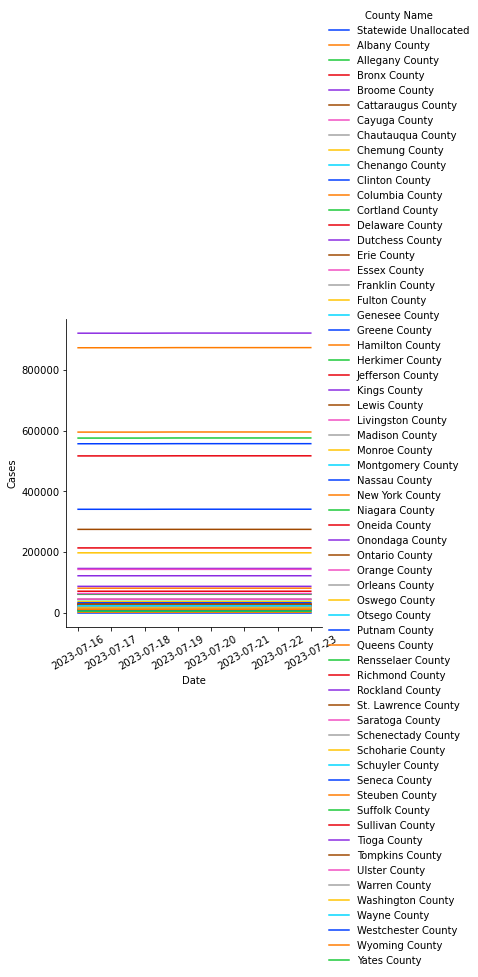

In [14]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# from seaborn.org
# seaborn.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, row=None, col=None, 
# col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, 
# size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, 
# facet_kws=None, **kwargs)

SummaryPlot = sns.relplot(data = df2, 
            x = 'Date', 
            y = 'Cases', 
            hue = 'County Name', 
            palette = 'bright',
            kind = 'line')

SummaryPlot.set_xticklabels(rotation=30)





Project Task: Calculate COVID-19 data trends for last week of the data. Are the cases increasing, decreasing, or stable? Each student chooses a state to analyze.

The DEATHS across all counties appear to be steady for the last week of data in the state of New York. Keep in mind this is raw data (not per capita).  See code below for a visualization of data.


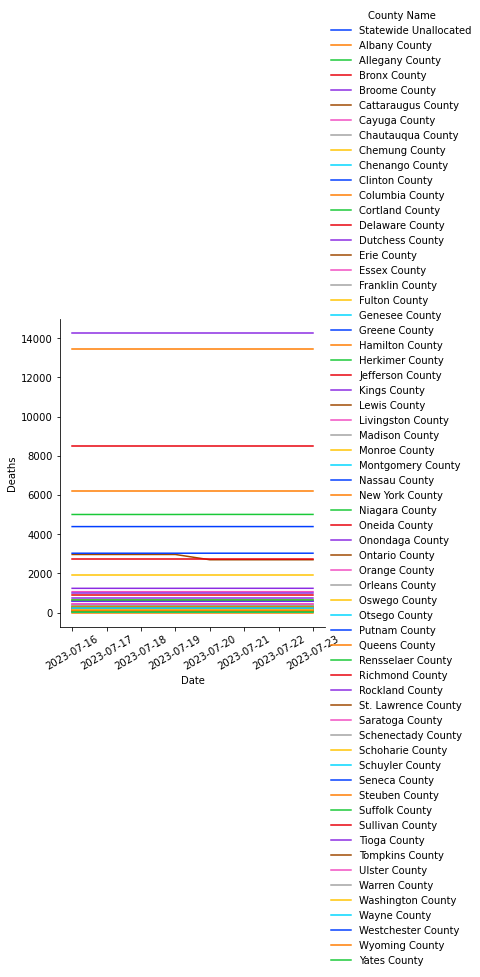

In [15]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# from seaborn.org
# seaborn.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, row=None, col=None, 
# col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, 
# size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, 
# facet_kws=None, **kwargs)

SummaryPlot = sns.relplot(data = df2, 
            x = 'Date', 
            y = 'Deaths', 
            hue = 'County Name', 
            palette = 'bright',
            kind = 'line')

SummaryPlot.set_xticklabels(rotation=30)

# the Deaths across all counties appear stable.  Keep in mind this is raw data (not per capita).



In [16]:
# Just did this as a sanity check that the data is in fact the same across the whole week.  You can change the
# County FIPS number to check other counties.

dfAlbany = df2[(df2.countyFIPS == 36005)]


dfAlbany.head(10)


,Unnamed: 0,Cases,countyFIPS,County Name,State,StateFIPS,Date,Deaths
4015464,4015464,516506,36005,Bronx County,NY,36,2023-07-16,8526
4018657,4018657,516506,36005,Bronx County,NY,36,2023-07-17,8526
4021850,4021850,516506,36005,Bronx County,NY,36,2023-07-18,8526
4025043,4025043,516827,36005,Bronx County,NY,36,2023-07-19,8526
4028236,4028236,516827,36005,Bronx County,NY,36,2023-07-20,8526
4031429,4031429,516827,36005,Bronx County,NY,36,2023-07-21,8526
4034622,4034622,516827,36005,Bronx County,NY,36,2023-07-22,8526
4037815,4037815,516827,36005,Bronx County,NY,36,2023-07-23,8526


Project Task:  Each student member creates notebooks to read the Enrichment data and displays them on a notebook. 

I have chosen to look at gas prices in relation to COVID-19 cases.  Gas price data was retrieved from:
https://beta.bls.gov/dataViewer/view/timeseries/APU000074714


In [18]:
dfGasoline = pd.read_csv("GasPrices.csv")
dfGasoline.head(20)

,Series ID,Year,Period,Label,Value
0,APU000074714,2020,M01,2020 Jan,2.567
1,APU000074714,2020,M02,2020 Feb,2.465
2,APU000074714,2020,M03,2020 Mar,2.267
3,APU000074714,2020,M04,2020 Apr,1.876
4,APU000074714,2020,M05,2020 May,1.879
5,APU000074714,2020,M06,2020 Jun,2.076
6,APU000074714,2020,M07,2020 Jul,2.176
7,APU000074714,2020,M08,2020 Aug,2.177
8,APU000074714,2020,M09,2020 Sep,2.193
9,APU000074714,2020,M10,2020 Oct,2.159


Project Task:  Each student member performs initial merges with the COVID-19 data using the variables in the Enrichment data.

In [19]:
dfGasoline.dtypes

Series ID     object
Year           int64
Period        object
Label         object
Value        float64
dtype: object

In [20]:
# Bypassing code, approaching problem with an alternate route in next chunk

# Right off the bat, the mismatch in my data needs to be resolved
# With this code both dates in my COVID df and my gasoline df will have the yyyy-dd-mm format

# dfGasoline['Label'] = pd.to_datetime(dfGasoline['Label'])


# Use Datetime.strftime() Method to extract month and year
# dfGasoline['Year'] = dfGasoline['Label'].dt.strftime('%Y')
# dfGasoline['Month'] = dfGasoline['Label'].dt.strftime('%m')
# dfGasoline['Day'] =  dfGasoline['Label'].dt.strftime('%d')

    

# dfGasoline.head(30)


In [21]:
## Warning, this chunk works without error, but it takes a very long time to run--O(n) but n = 4.5 million


# Use Datetime.strftime() Method to extract month and year
#df['Year'] = df['Date'].dt.strftime('%Y')
df['altdate'] = df['Date'].dt.strftime('%Y') + " " +df['Date'].dt.strftime('%b')

#df['Day'] =  df['Date'].dt.strftime('%d')

#for i in dfGasoline['Month']

df.head()



,Unnamed: 0,Cases,countyFIPS,County Name,State,StateFIPS,Date,Deaths,altdate
0,0,0,0,Statewide Unallocated,AL,1,2020-01-22,0,2020 Jan
1,1,0,1001,Autauga County,AL,1,2020-01-22,0,2020 Jan
2,2,0,1003,Baldwin County,AL,1,2020-01-22,0,2020 Jan
3,3,0,1005,Barbour County,AL,1,2020-01-22,0,2020 Jan
4,4,0,1007,Bibb County,AL,1,2020-01-22,0,2020 Jan


In [34]:

# Now the date types in my enrichment dataset match the altdate column.  I am going to do a LEFT join 

#dfEnrichment = dfLong.loc[:, ~dfLong.columns.duplicated()]

dfEnrichment = df.merge(dfGasoline, how = 'left', left_on = 'altdate', right_on = 'Label')
dfEnrichment.head(40)




,Unnamed: 0,Cases,countyFIPS,County Name,State,StateFIPS,Date,Deaths,altdate,Series ID,Year,Period,Label,Value
0,0,0,0,Statewide Unallocated,AL,1,2020-01-22,0,2020 Jan,APU000074714,2020,M01,2020 Jan,2.567
1,1,0,1001,Autauga County,AL,1,2020-01-22,0,2020 Jan,APU000074714,2020,M01,2020 Jan,2.567
2,2,0,1003,Baldwin County,AL,1,2020-01-22,0,2020 Jan,APU000074714,2020,M01,2020 Jan,2.567
3,3,0,1005,Barbour County,AL,1,2020-01-22,0,2020 Jan,APU000074714,2020,M01,2020 Jan,2.567
4,4,0,1007,Bibb County,AL,1,2020-01-22,0,2020 Jan,APU000074714,2020,M01,2020 Jan,2.567
5,5,0,1009,Blount County,AL,1,2020-01-22,0,2020 Jan,APU000074714,2020,M01,2020 Jan,2.567
6,6,0,1011,Bullock County,AL,1,2020-01-22,0,2020 Jan,APU000074714,2020,M01,2020 Jan,2.567
7,7,0,1013,Butler County,AL,1,2020-01-22,0,2020 Jan,APU000074714,2020,M01,2020 Jan,2.567
8,8,0,1015,Calhoun County,AL,1,2020-01-22,0,2020 Jan,APU000074714,2020,M01,2020 Jan,2.567
9,9,0,1017,Chambers County,AL,1,2020-01-22,0,2020 Jan,APU000074714,2020,M01,2020 Jan,2.567


In [35]:
# Dropping redundant and working columns

col_drop = ['altdate',
           'Series ID',
            'Year',
            'Period',
            'Label',
           ]

dfEnrichment.drop(col_drop, inplace = True, axis = 1)


# Renaming some Column Headers
dfEnrichment.rename(columns={"Value": "GasolinePrice"}, inplace=True)
dfEnrichment.drop('Unnamed: 0', inplace = True, axis = 1)


In [36]:
dfEnrichment.head()

,Cases,countyFIPS,County Name,State,StateFIPS,Date,Deaths,GasolinePrice
0,0,0,Statewide Unallocated,AL,1,2020-01-22,0,2.567
1,0,1001,Autauga County,AL,1,2020-01-22,0,2.567
2,0,1003,Baldwin County,AL,1,2020-01-22,0,2.567
3,0,1005,Barbour County,AL,1,2020-01-22,0,2.567
4,0,1007,Bibb County,AL,1,2020-01-22,0,2.567


In [37]:


print(dfEnrichment.shape)
print(dfEnrichment.isnull().sum())

(4039145, 8)
Cases            0
countyFIPS       0
County Name      0
State            0
StateFIPS        0
Date             0
Deaths           0
GasolinePrice    0
dtype: int64
